# Import supporting package

In [1]:
import copy
import glob
from datetime import datetime

# The package for data structure
import xarray as xr
import pandas as pd
import numpy as np

# The packages for working with uncertainties
from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties import umath

# The package for plotting
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18 # Set the global font size

# -------------- The modules written by us --------------

# The packages for read data
from DataContainer.ReadData import read_hdf5_file, read_hdf5_global, read_hdf5_run_time, read_csv_file

# The packages for data analysis
from Analyser.ImagingAnalyser import ImageAnalyser
from Analyser.FitAnalyser import FitAnalyser
from Analyser.FitAnalyser import ThomasFermi2dModel, DensityProfileBEC2dModel, Polylog22dModel
from Analyser.FFTAnalyser import fft, ifft, fft_nutou
from ToolFunction.ToolFunction import *

# Add errorbar plot to xarray package
from ToolFunction.HomeMadeXarrayFunction import errorbar, dataarray_plot_errorbar
xr.plot.dataarray_plot.errorbar = errorbar
xr.plot.accessor.DataArrayPlotAccessor.errorbar = dataarray_plot_errorbar

## Start a client for parallel computing

In [2]:
from dask.distributed import Client
client = Client(n_workers=8, threads_per_worker=16, processes=True, memory_limit='20GB')
client

C:\Users\data\AppData\Roaming\Python\Python39\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51790 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:51793' processes=8 threads=128, memory=149.01 GiB>

## Set global path for experiment

In [3]:
groupList = [
    "images/MOT_3D_Camera/in_situ_absorption",
    "images/ODT_1_Axis_Camera/in_situ_absorption",
    "images/ODT_2_Axis_Camera/in_situ_absorption",
]

dskey = {
    "images/MOT_3D_Camera/in_situ_absorption": "camera_0",
    "images/ODT_1_Axis_Camera/in_situ_absorption": "camera_1",
    "images/ODT_2_Axis_Camera/in_situ_absorption": "camera_2",
}


In [5]:
# img_dir = 'C:/Users/control/DyLab/Experiments/DyBEC/'
img_dir = '//DyLabNAS/Data/'
SequenceName = "Evaporative_Cooling"
folderPath = img_dir + SequenceName + "/" + '2023/07/03'# get_date()

# Load data

## along x-axis

In [7]:
compX = xr.open_zarr("./compX.zarr")
compY = xr.open_zarr("./compY.zarr")
compZ = xr.open_zarr("./compZ.zarr")

In [ ]:
B = np.sqrt((compX['als_final_current'] * 9.52 -0.164)**2 + (0.435**2 - 0.164**2))
compX['als_final_current'] = B
compX['als_final_current'] = B

In [ ]:
B = np.sqrt((compY['als_final_current'] * 10.3 + 0.202)**2 + (0.440**2 - 0.202**2))
compY['als_final_current'] = B
compY['als_final_current'] = B

In [12]:
B = np.sqrt((compZ['als_final_current'] * 10.6021 + 0.3254)**2 + (0.4333**2 - 0.3254**2))
compZ['als_final_current'] = B
compZ['als_final_current'] = B

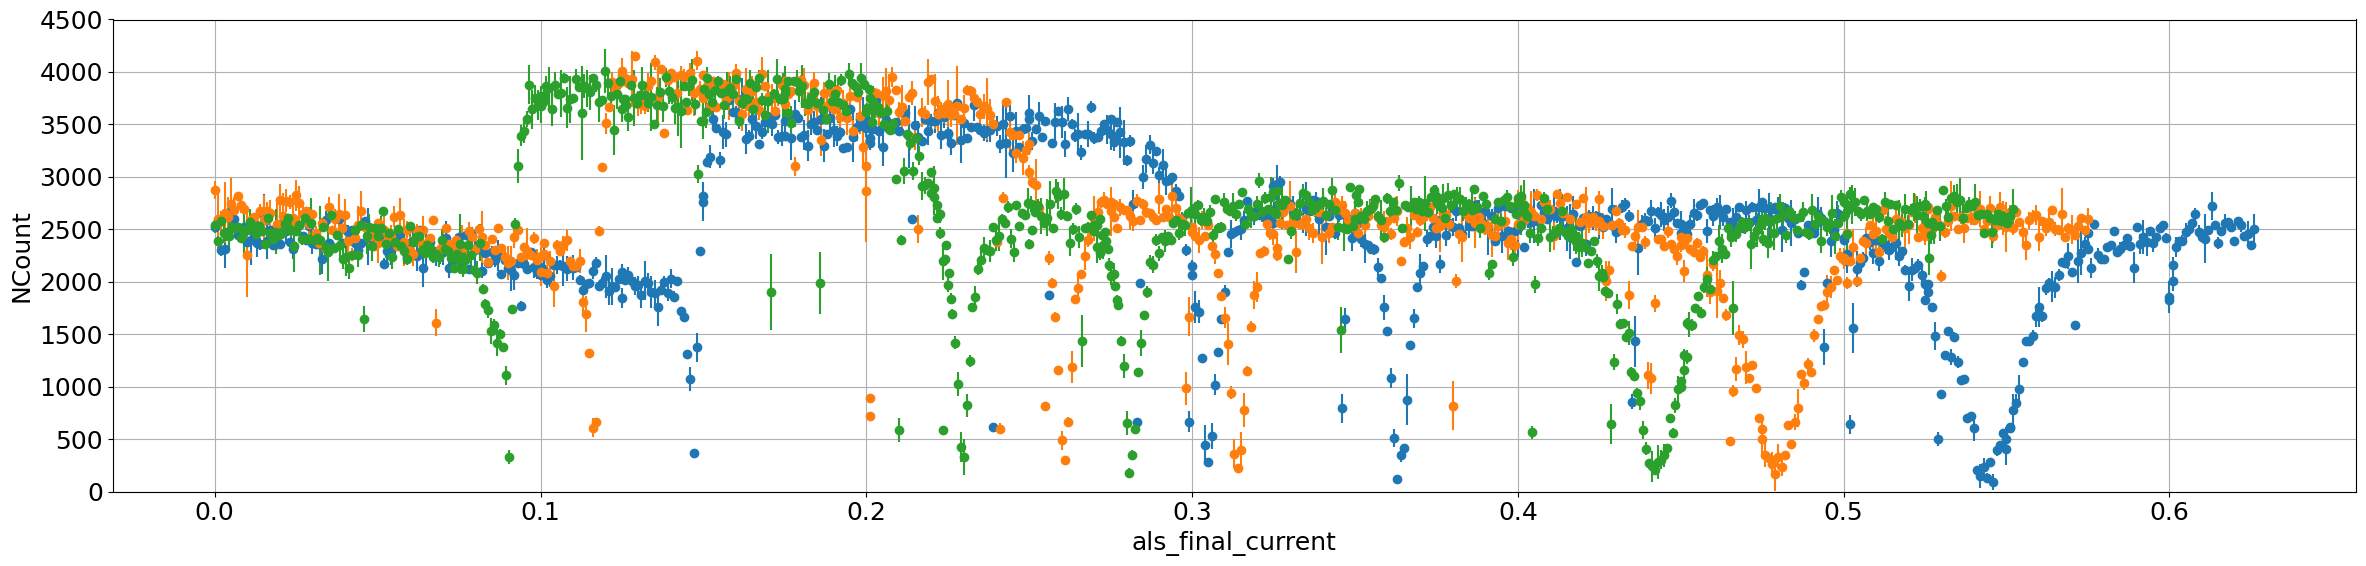

In [9]:
fig = plt.figure(figsize=(24,6))
ax = fig.gca()
compX['OD'].plot.errorbar(ax=ax, yerr = compX['std'], fmt='o')
compY['OD'].plot.errorbar(ax=ax, yerr = compY['std'], fmt='o')
compZ['OD'].plot.errorbar(ax=ax, yerr = compZ['std'], fmt='o')
plt.ylim([0, 4500])
plt.ylabel('NCount')
plt.tight_layout()
plt.grid(visible=1)
plt.show()